In [1]:
clear
close all
tic
%%dirContents
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
eeg_chan=[];
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        %% vhdr_set
        vhdr_path = [Pathname1 filesep filename1{days}];
        suffix = '.vhdr';
        dirContents = dir(fullfile(vhdr_path , ['*' suffix]));%查找vhdr数据
        load_vhdr_name = dirContents.name;
        EEG = pop_loadbv(vhdr_path, load_vhdr_name, [], []);
        EEG = eeg_checkset( EEG );
        %% 重参考
        if EEG.nbchan==65
            EEG = pop_select( EEG, 'nochannel',{'EOG','BIP13'});
        else
            EEG = pop_select( EEG, 'nochannel',{'EOG'});
        end
        EEG = pop_reref( EEG, [13 19]);
        EEG = eeg_checkset( EEG );
        EEG = pop_epoch( EEG, {  's11'  },[-0.1         0.6], 'newname', ' resampled pruned with ICA epochs', 'epochinfo', 'yes');
        EEG = eeg_checkset( EEG );
        EEG = pop_rmbase( EEG, [-100 0] ,[]);
        EEG = eeg_checkset( EEG );
        STD=squeeze(mean(EEG.data,3));
        n_wavelet     = EEG.pnts;
        n_data        = EEG.pnts*EEG.trials;
        n_convolution = n_wavelet+n_data-1;
        n_conv_pow2   = pow2(nextpow2(n_convolution));
        time    = -EEG.pnts/EEG.srate/2:1/EEG.srate:EEG.pnts/EEG.srate/2-1/EEG.srate;
        %time    = linspace(-0.1,0.6,1400);
        chan2plot  = 'Fz';
        eegfft = fft(reshape(EEG.data(strcmpi(chan2plot,{EEG.chanlocs.labels}),:,:),1,[]),n_conv_pow2);
        %frequencies_81 = logspace(log10(20), log10(100), 150);%1-50Hz
        %         s_81 = logspace(log10(3), log10(10), length(frequencies_81))./(2*pi*frequencies_81);
        % 生成线性刻度的频率向量
        frequencies_81 = linspace(20, 100, 150); % 20Hz到100Hz的线性刻度频率
        % 确定尺度范围
        s_min = 3 / (2 * pi * max(frequencies_81)); % 对应最高频率的最小尺度
        s_max = 10 / (2 * pi * min(frequencies_81)); % 对应最低频率的最大尺度
        % 生成线性刻度的尺度向量
        s_81 = linspace(s_min, s_max, length(frequencies_81));
        itpc_81 = zeros(length(frequencies_81),EEG.pnts);
        for fi=1:length(frequencies_81)
            %create wavelet
            wavelet = exp(2*1i*pi*frequencies_81(fi).*time) .* exp(-time.^2./(2*(s_81(fi)^2)))/frequencies_81(fi);
            %convolution
            eegconv = ifft(fft(wavelet,n_conv_pow2).*eegfft);
            eegconv = eegconv(1:n_convolution);
            eegconv = reshape(eegconv(floor((EEG.pnts-1)/2):end-1-ceil((EEG.pnts-1)/2)),EEG.pnts,EEG.trials);
            %extract ITPC
            itpc_81(fi,:) = abs(mean(exp(1i*angle(eegconv)),2));
        end
%        ITPC_path=[Pathname1 filesep filename1{days}];
 %       savepath=strcat(ITPC_path,'\ITPC_2');%拼接路径和文件名ITPC_no=-0.6-0.6 ITPC_2=-0.35-0.35
  %      save(savepath,'itpc_81','time')%指定存储路径 存储名称和存储进去的变量
    end
end


鏃犳硶璇嗗埆鐨勫瓧娈靛悕绉� "times"銆�



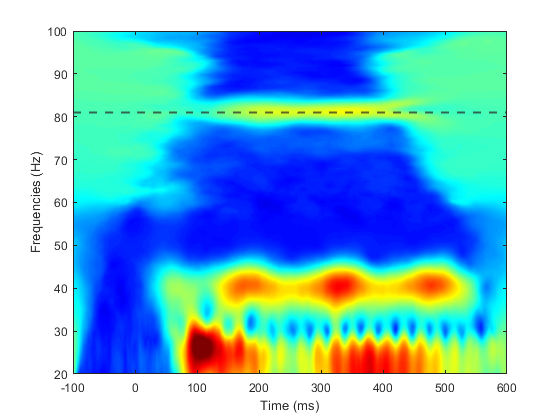

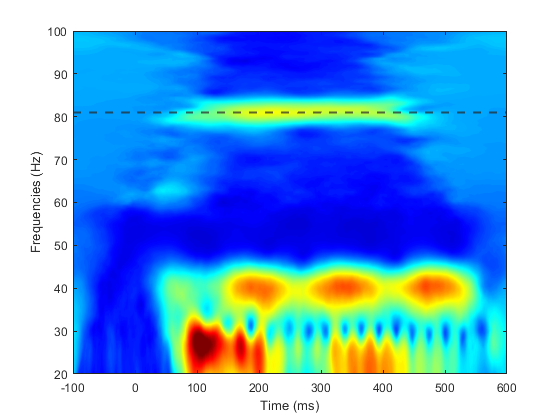

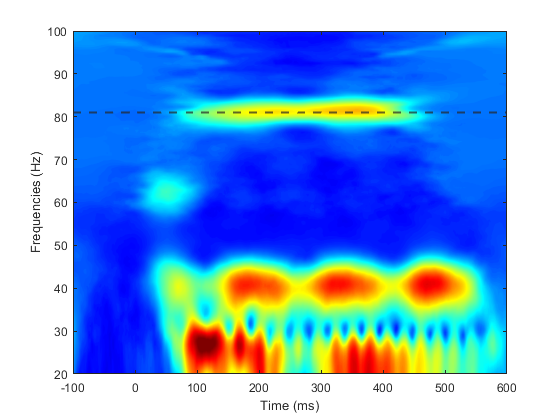

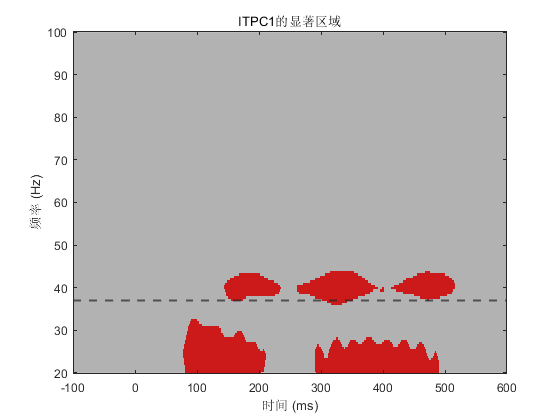

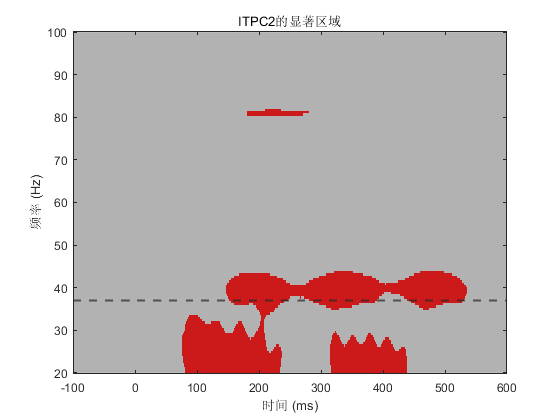

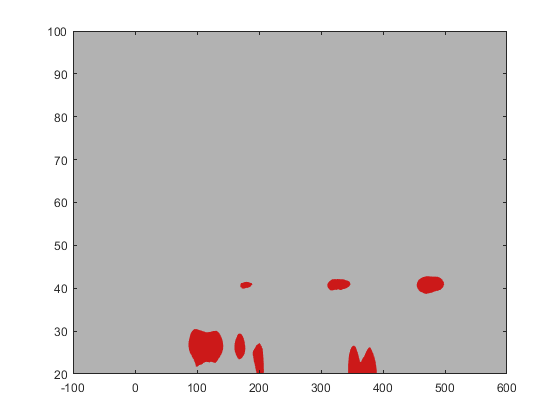

In [2]:
clear
close all
tic
%%dirContents
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
%% ITPC-GROUP
times    = linspace(-100,600,1400);
%frequencies_81 = logspace(log10(20), log10(100), 150);%1-50Hz
frequencies_81 = linspace(20, 100, 150);
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        Data=load( [Pathname1 filesep filename1{days} filesep 'ITPC_2.mat'] );
        ITPC_81(isSub,days,:,:)=Data.itpc_81;
    end
end
figure(1)
ITPC_1=squeeze(mean(ITPC_81(:,1,:,:),1));
contourf(times,frequencies_81,ITPC_1,150,'linecolor','none')
set(gca,'clim',[0 .12],'xlim',[-100 600])
colormap('jet')
xlabel('Time (ms)'), ylabel('Frequencies (Hz)')
yline(81, '--', 'LineWidth', 1.5)
figure(2)
ITPC_2=squeeze(mean(ITPC_81(:,2,:,:),1));
contourf(times,frequencies_81,ITPC_2,150,'linecolor','none')
colormap('jet')
set(gca,'clim',[0 .12],'xlim',[-100 600])
xlabel('Time (ms)'), ylabel('Frequencies (Hz)')
yline(81, '--', 'LineWidth', 1.5)
figure(3)
ITPC_3=squeeze(mean(ITPC_81(:,3,:,:),1));
contourf(times,frequencies_81,ITPC_3,150,'linecolor','none')
colormap('jet')
set(gca,'clim',[0 .12],'xlim',[-100 600])
xlabel('Time (ms)'), ylabel('Frequencies (Hz)')
yline(81, '--', 'LineWidth', 1.5)
%% ITPC-signi
% 设置显著性水平
alpha = 0.05;
%Z检验
% 第一步：计算统计显著性
% 假设您已经定义了显著性阈值alpha
% 计算ITPC_1的均值和标准差
mean_ITPC_1 = mean(ITPC_1(:));
std_ITPC_1 = std(ITPC_1(:));
% 计算z分数
z_score = (ITPC_1 - mean_ITPC_1) / std_ITPC_1;
% % 假设数据服从正态分布，计算每个点的p值
% p_values = 2 * (1 - normcdf(abs(z_score)));%%双尾
p_values = 1 - normcdf(abs(z_score));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_1 = p_values < alpha;
% 图块显示
figure(4);
% 绘制ITPC_1的等高线图
contourf(times, frequencies_81, ITPC_1, 150, 'linecolor', 'none')
set(gca, 'clim', [0 .2], 'xlim', [-100 600])
hold on;
% 将显著区域的颜色全部变为红色
colormap(gca, [0.7 0.7 0.7; 0.8 0.1 0.1]); % 使用深灰色和深红色的颜色映射
imagesc(times, frequencies_81, significant_mask_1, 'AlphaData', significant_mask_1)
xlabel('时间 (ms)'), ylabel('频率 (Hz)')
yline(37, '--', 'LineWidth', 1.5)
title('ITPC1的显著区域')
%
mean_ITPC_2 = mean(ITPC_2(:));
std_ITPC_2 = std(ITPC_2(:));
% 计算z分数
z_score = (ITPC_2 - mean_ITPC_2) / std_ITPC_2;
% 假设数据服从正态分布，计算每个点的p值
%p_values = 2 * (1 - normcdf(abs(z_score)));
p_values = 1 - normcdf(abs(z_score));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_2 = p_values < alpha;
% 图块显示
figure(5);
% 绘制ITPC_1的等高线图
contourf(times, frequencies_81, ITPC_2, 150, 'linecolor', 'none')
set(gca, 'clim', [0 .2], 'xlim', [-100 600])
hold on;
% 将显著区域的颜色全部变为红色
colormap(gca, [0.7 0.7 0.7; 0.8 0.1 0.1]); % 使用深灰色和深红色的颜色映射
imagesc(times, frequencies_81, significant_mask_2, 'AlphaData', significant_mask_2)
xlabel('时间 (ms)'), ylabel('频率 (Hz)')
yline(37, '--', 'LineWidth', 1.5)
title('ITPC2的显著区域')
%
mean_ITPC_3 = mean(ITPC_3(:));
std_ITPC_3 = std(ITPC_3(:));
% 计算z分数
z_score = (ITPC_3 - mean_ITPC_3) / std_ITPC_3;
% 假设数据服从正态分布，计算每个点的p值
%p_values = 2 * (1 - normcdf(abs(z_score)));
p_values = 1 - normcdf(abs(z_score));%单尾
% 第二步：可视化显著区域
% 假设您想要可视化p < alpha的区域
% 创建一个二进制掩码，其中显著区域标记为1
significant_mask_3 = p_values < alpha;
% 图块显示
figure(6);
contourf(times, frequencies_81, ITPC_3, 150, 'linecolor', 'none')
set(gca, 'clim', [0 .2], 'xlim', [-100 600])
hold on;
% 将显著区域的颜色全部变为红色
colormap(gca, [0.7 0.7 0.7; 0.8 0.1 0.1]); % 使用深灰色和深红色的颜色映射
imagesc(Data.times, frequencies_37, significant_mask_3, 'AlphaData', significant_mask_3)
xlabel('时间 (ms)'), ylabel('频率 (Hz)')
%yline(37, '--', 'LineWidth', 1.5)
title('ITPC3的显著区域')